In [1]:
##to analyse the ball hit by which player

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [33]:
with open('../trackers_stubs/ball_detections.pkl', 'rb' ) as f:
    ball_positions = pickle.load(f)

In [34]:
ball_positions

[{1: [903.1900024414062,
   580.37841796875,
   918.9714965820312,
   597.1826782226562]},
 {},
 {1: [878.9599609375,
   640.0679321289062,
   894.2600708007812,
   656.4915771484375]},
 {},
 {},
 {},
 {1: [821.3306274414062,
   686.2396240234375,
   839.59130859375,
   707.4821166992188]},
 {1: [813.3606567382812,
   693.8736572265625,
   832.8025512695312,
   715.237060546875]},
 {1: [793.4745483398438,
   717.5343627929688,
   814.5737915039062,
   740.201416015625]},
 {1: [775.3260498046875,
   742.0416870117188,
   799.269775390625,
   767.6392822265625]},
 {},
 {1: [776.8094482421875,
   716.614013671875,
   797.4882202148438,
   739.3178100585938]},
 {},
 {},
 {},
 {1: [813.3575439453125,
   569.0592041015625,
   831.916748046875,
   588.9427490234375]},
 {1: [819.1074829101562,
   552.928466796875,
   834.603271484375,
   571.9794311523438]},
 {},
 {},
 {},
 {1: [847.2648315429688,
   451.8659362792969,
   863.7691650390625,
   469.3202209472656]},
 {},
 {},
 {},
 {},
 {},
 {1:

In [35]:
##now using the interpolation code 

ball_positions = [x.get(1,[]) for x in ball_positions]

#converting into pandas dataframe
ball_positions_df = pd.DataFrame(ball_positions, columns=['x1', 'y1', 'x2', 'y2'])

#interpolating using builtin function
ball_positions_df = ball_positions_df.interpolate()
#now there  may be a case where the first element of the df is missing so to avoid that
ball_positions_df = ball_positions_df.bfill()

In [36]:
ball_positions_df

,x1,y1,x2,y2
0,903.190002,580.378418,918.971497,597.182678
1,891.074982,610.223175,906.615784,626.837128
2,878.959961,640.067932,894.260071,656.491577
3,864.552628,651.610855,880.592880,669.239212
4,850.145294,663.153778,866.925690,681.986847
...,...,...,...,...
209,1182.916626,247.610703,1200.939209,265.035553
210,1182.494059,236.515996,1198.692749,252.654851
211,1182.071493,225.421290,1196.446289,240.274150
212,1181.648926,214.326584,1194.199829,227.893448


In [37]:
##now getting the hit positions

ball_positions_df['mid_y'] = (ball_positions_df['y1'] + ball_positions_df['y2'])/2

ball_positions_df['rolling_mid_y'] = ball_positions_df['mid_y'].rolling( window=5 ,min_periods=1, center=False).mean()

In [38]:
ball_positions_df

,x1,y1,x2,y2,mid_y,rolling_mid_y
0,903.190002,580.378418,918.971497,597.182678,588.780548,588.780548
1,891.074982,610.223175,906.615784,626.837128,618.530151,603.655350
2,878.959961,640.067932,894.260071,656.491577,648.279755,618.530151
3,864.552628,651.610855,880.592880,669.239212,660.425034,629.003872
4,850.145294,663.153778,866.925690,681.986847,672.570312,637.717160
...,...,...,...,...,...,...
209,1182.916626,247.610703,1200.939209,265.035553,256.323128,279.733511
210,1182.494059,236.515996,1198.692749,252.654851,244.585424,268.021817
211,1182.071493,225.421290,1196.446289,240.274150,232.847720,256.303620
212,1181.648926,214.326584,1194.199829,227.893448,221.110016,244.578921


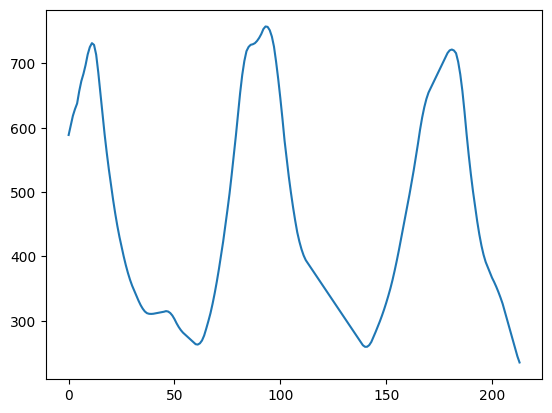

In [39]:
##ploting the data

plt.plot(ball_positions_df['rolling_mid_y'])

In [40]:
##the ball is hit where the direction i.e. y position is changed 

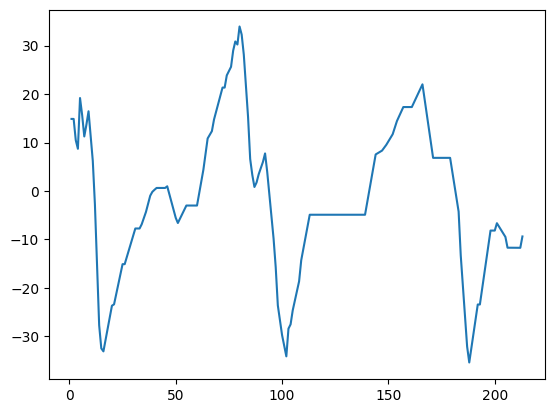

In [41]:
ball_positions_df['difference_y'] = ball_positions_df['rolling_mid_y'].diff()
plt.plot(ball_positions_df['difference_y'])

In [42]:
min_change_in_frame = 20

ball_positions_df['hit'] = 0

for i in range(len(ball_positions_df) - 1) :
    positive_change = ball_positions_df['difference_y'].iloc[i] < 0  and ball_positions_df['difference_y'].iloc[i+1] > 0
    negative_change = ball_positions_df['difference_y'].iloc[i] > 0  and ball_positions_df['difference_y'].iloc[i+1] < 0
    
    hit_count = 0
    
    if positive_change or negative_change :
        
        
        for each_frame in range(i, i + int(min_change_in_frame*1.2)):
            
            pos_change = ball_positions_df['difference_y'].iloc[i] < 0  and ball_positions_df['difference_y'].iloc[each_frame+1] > 0
            neg_change = ball_positions_df['difference_y'].iloc[i] > 0  and ball_positions_df['difference_y'].iloc[each_frame+1] < 0
            
            if(pos_change and positive_change) or (neg_change and negative_change): 
                hit_count+=1 
                #print('hey')
        
        if hit_count >= min_change_in_frame-1 :
            ball_positions_df['hit'].iloc[i] = 1
        

C:\Users\91637\AppData\Local\Temp\ipykernel_7044\4026437351.py:24: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  ball_positions_df['hit'].iloc[i] = 1
C:\Users\91637\AppData\Local\Temp\ipykernel_7044\4026437351.py:24: SettingWithCopyWarning: 

In [43]:
ball_positions_df[ball_positions_df['hit']==1]

,x1,y1,x2,y2,mid_y,rolling_mid_y,difference_y,hit
11,776.809448,716.614014,797.488220,739.317810,727.965912,731.526569,6.221008,1
61,897.580424,260.810913,909.306620,272.996663,266.903788,263.044166,-0.536467,1
93,631.780286,746.530286,650.984180,768.386877,757.458582,757.421221,3.973021,1
140,800.083313,253.295233,812.044189,266.114496,259.704865,259.553263,-2.412983,1
181,1278.215332,705.730316,1297.031311,726.019257,715.874786,721.613439,1.291423,1


In [44]:
hit_frame = ball_positions_df[ball_positions_df['hit']==1].index.tolist()

In [30]:
##packing all the things together


ball_positions_df['mid_y'] = (ball_positions_df['y1'] + ball_positions_df['y2'])/2

ball_positions_df['rolling_mid_y'] = ball_positions_df['mid_y'].rolling( window=5 ,min_periods=1, center=False).mean()

min_change_in_frame = 20

ball_positions_df['hit'] = 0

for i in range(len(ball_positions_df) - 1) :
    positive_change = ball_positions_df['difference_y'].iloc[i] < 0  and ball_positions_df['difference_y'].iloc[i+1] > 0
    negative_change = ball_positions_df['difference_y'].iloc[i] > 0  and ball_positions_df['difference_y'].iloc[i+1] < 0
    
    hit_count = 0
    
    if positive_change or negative_change :
        
        
        for each_frame in range(i, i + int(min_change_in_frame*1.2)):
            
            pos_change = ball_positions_df['difference_y'].iloc[i] < 0  and ball_positions_df['difference_y'].iloc[each_frame+1] > 0
            neg_change = ball_positions_df['difference_y'].iloc[i] > 0  and ball_positions_df['difference_y'].iloc[each_frame+1] < 0
            
            if(pos_change and positive_change) or (neg_change and negative_change): 
                hit_count+=1 
                #print('hey')
        
        if hit_count >= min_change_in_frame-1 :
            ball_positions_df['hit'].iloc[i] = 1
            
hit_frame = ball_positions_df[ball_positions_df['hit']==1].index.tolist()

AttributeError: 'list' object has no attribute 'get'